## Задание 6.4

In [2]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

In [3]:
from numpy import genfromtxt
my_data = genfromtxt('6.csv', delimiter=',', skip_header = 3)
N = len(my_data)
print (len(my_data))

1000


In [29]:
file = open('6.csv', 'r')
mylambda = 1 / float(file.readline()[9:])
t_0 = float(file.readline()[6:])
t = float(file.readline()[4:])
print(r'Значение лямда = {}'.format(mylambda))

Значение лямда = 0.011363636363636364


Возьмем в качестве априорного распределения сопряженное к экспоненциальному: то есть Гамма распределение $Г(\alpha, \beta)$.
С матожиданием равным $\frac{\alpha}{\beta}$. Тогда байесовская оценка параметра $\hat{\lambda} = \frac{\alpha_0 + n}{\beta_0 + \sum_{i=1}^n x_i}.$

Функция байесовской оценки

In [5]:
def Bayesian(alpha, beta, x):
    b = beta + sum(x)
    a = alpha + len(x)
    if b!=0:
        return (a/b)
    else:
        return 0

Подберем удачным образом параметры $\alpha$ и $\beta$, чтобы оценка получилась наиболее удачной.

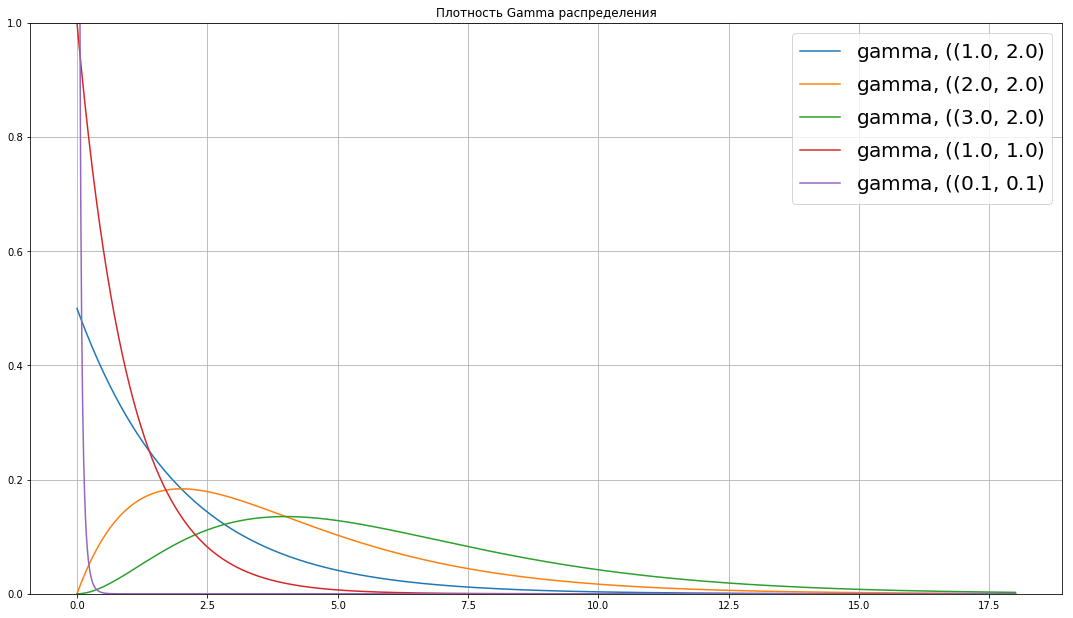

In [83]:
params = np.array([(1,2), (2,2), (3,2), (1,1), (0.1,0.1)])

plt.title(r'Плотность Gamma распределения')
for i in range(0, len(params)):
    alpha_0 = params[i][0]
    beta_0 = params[i][1]
    x = np.linspace(0,18,1000)
    plt.plot(x, st.gamma.pdf(x, alpha_0, scale=beta_0), label='gamma, $(\alpha, \beta)=$({}, {})'.format(alpha_0, beta_0))
plt.ylim(0, 1)
plt.legend(fontsize=20, loc=1)
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)

Конечно если мы заранее знаем в каких пределах лежит значение $\lambda$, то в таком случае подберем параметры так, чтобы наше значение было рядом с максимумом плотности априорного распределения. Сразу видно, что $Gamma(3,2)$ даст плохую оценку так как его максимум плотности находится над значением примерно $3$, что означало бы, что 3 сервера ломались за 300 секунду, что конечно не похоже на правду) Интенсивность $\lambda$ можно считать, как скорость поломки серверов в единицу времени $t_0$.
 Следовательно из физических соображений примерно будем считать, что один серевер ломается за 8 часов. То есть $\lambda$ около $0.01$.

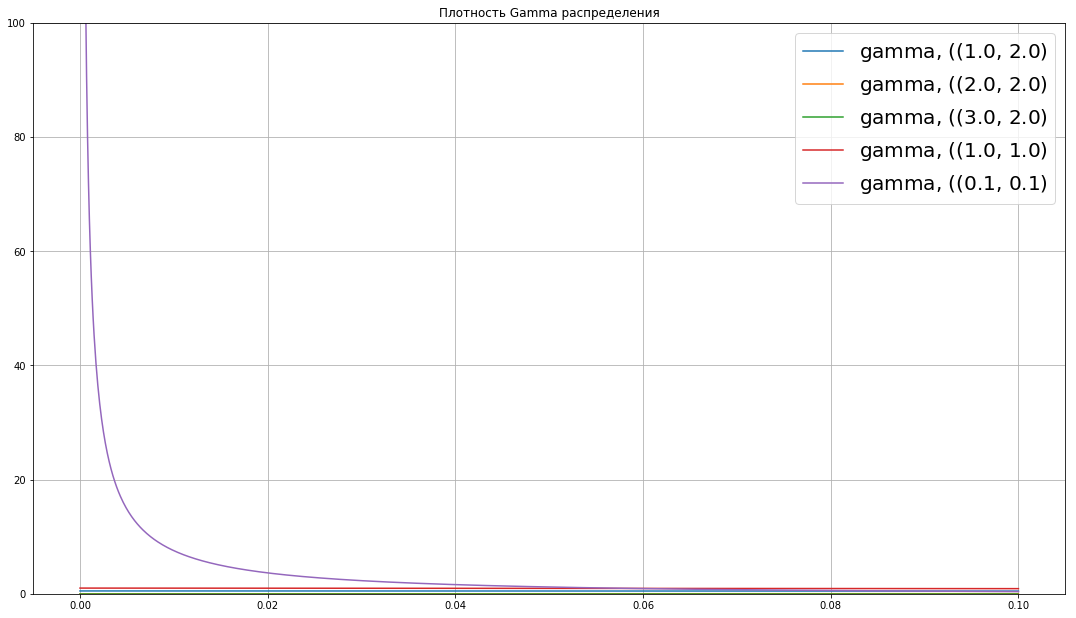

In [98]:
params = np.array([(1,2), (2,2), (3,2), (1,1), (0.1,0.1)])
plt.title(r'Плотность Gamma распределения')
for i in range(0, len(params)):
    alpha_0 = params[i][0]
    beta_0 = params[i][1]
    x = np.linspace(0,0.1,1000)
    plt.plot(x, st.gamma.pdf(x, alpha_0, scale=beta_0), label='gamma, $(\alpha, \beta)=$({}, {})'.format(alpha_0, beta_0))
plt.ylim(0,100)
plt.legend(fontsize=20, loc=1)
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)

Наиболее подходящим кажется $Gamma(0.1,0.1)$. Проверим как оценки приближают параметр.

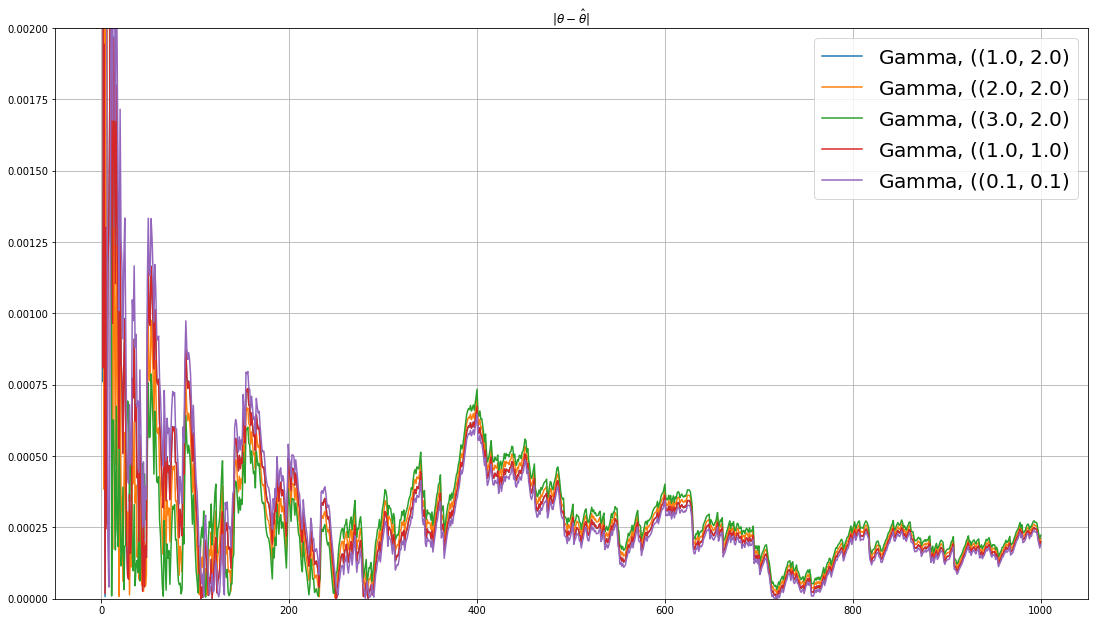

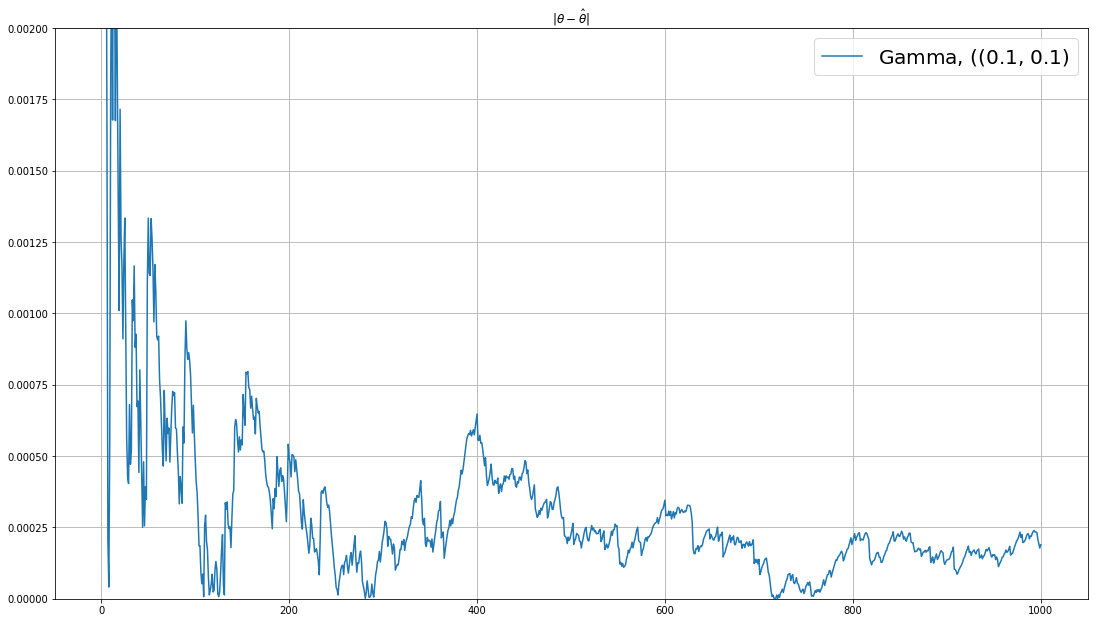

In [107]:
params = np.array([(1,2), (2,2), (3,2), (1,1), (0.1,0.1)])
good_bayes = np.zeros(N+1)
delta = np.zeros(N+1)
for i in range(0, len(my_data)-1):
    delta[i] = my_data[i+1]-my_data[i]
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.ylim(0,0.002)
for i in range(0, len(params)):
    stat_bayes = np.zeros(N+1)
    alpha_0 = params[i][0]
    beta_0 = params[i][1]
    for j in range(1, N+1):
        stat_bayes[j] = Bayesian(alpha_0, beta_0, delta[:j])
        if i+1 == len(params):
            good_bayes[j] = Bayesian(alpha_0, beta_0, delta[:j])
    plt.plot(np.arange(1,N+1), abs(stat_bayes[1:] - mylambda), label='Gamma, $(\alpha, \beta)=$({}, {})'.format(alpha_0, beta_0))
plt.legend(fontsize=20, loc=1)
plt.title(r'$|\theta - \hat{\theta}|$')
plt.show()
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.ylim(0,0.002)
plt.plot(np.arange(1,N+1), abs(good_bayes[1:] - mylambda), label='Gamma, $(\alpha, \beta)=$({}, {})'.format(alpha_0, beta_0))
plt.legend(fontsize=20, loc=1)
plt.title(r'$|\theta - \hat{\theta}|$')
plt.show()

Из графика видно, что $Gamma(0.1,0.1)$ лучше всего приближает параметр

Теперь подставим вместо $\lambda$ оценку $\hat{\theta}$ в решение задачи 5.1

In [110]:
teta = 1
time = np.linspace(0, t,teta*(int(t/t_0))+1) # время выхода
false = np.array(0) # Вышедшие из строя сервера
predic = np.array(0) # Предсказание в данной модели
for i in range(teta*(int(t/t_0))):
    temp = len(my_data[my_data <= time[i+1]])
    false = np.append(false, temp)
    predic = np.append(predic, (t-time[i+1])*good_bayes[i] + temp)


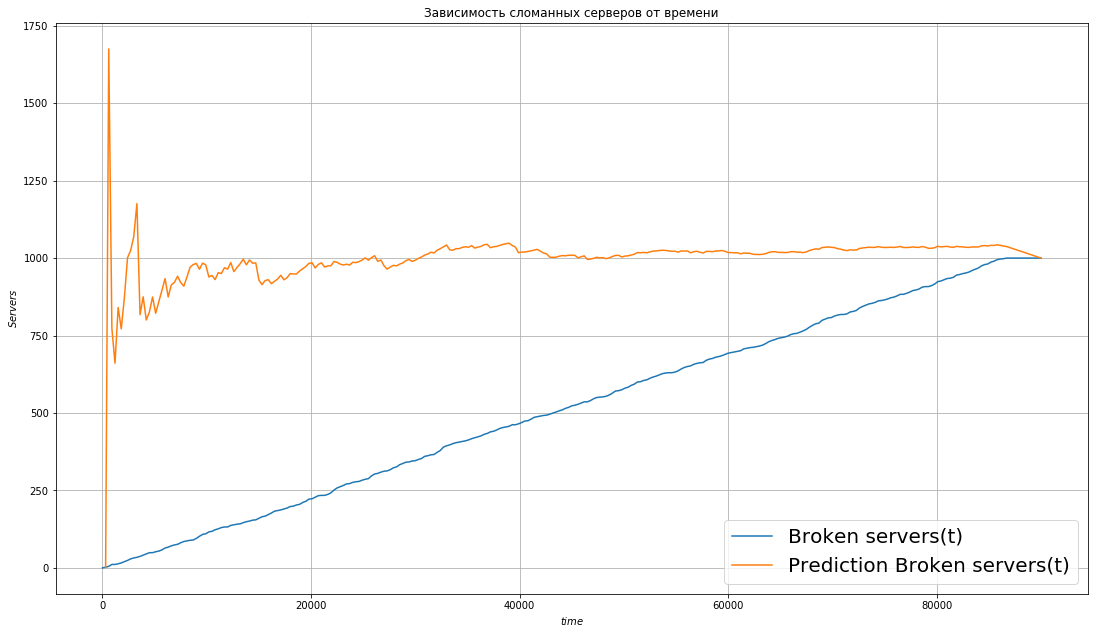

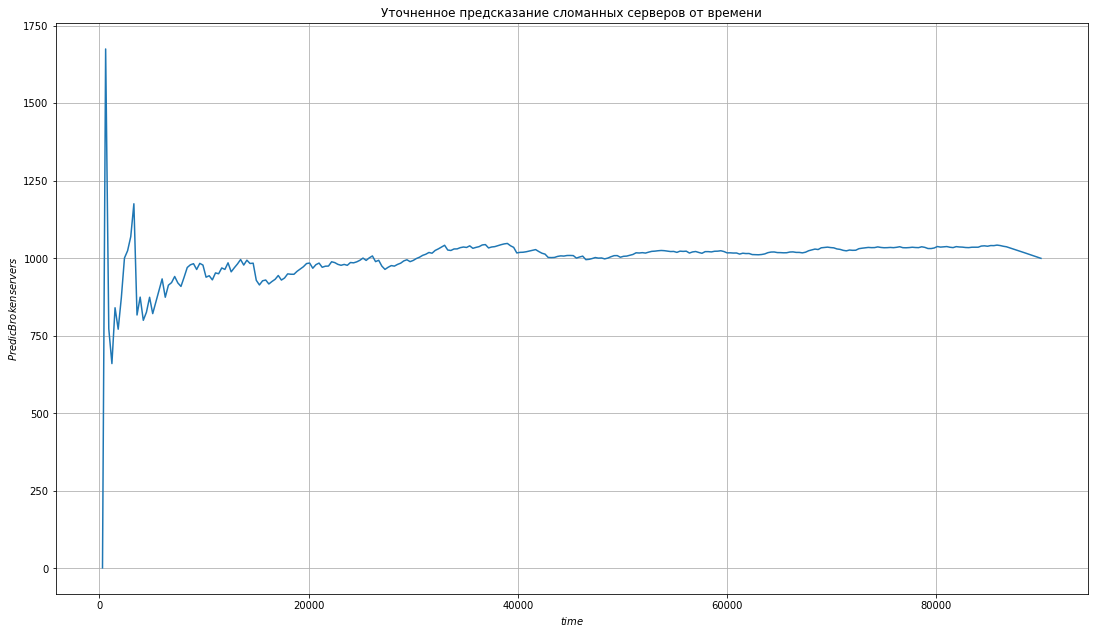

In [112]:
plt.plot(time, false, label = r'Broken servers(t)')
plt.plot(time[1:], predic[1:], label = r'Prediction Broken servers(t)')
plt.legend(fontsize=20, loc=4)
plt.title (r'Зависимость сломанных серверов от времени')
plt.xlabel(r'$time$')
plt.ylabel(r'$Servers$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.show()

plt.plot(time[1:], predic[1:])
plt.title (r'Уточненное предсказание сломанных серверов от времени')
plt.xlabel(r'$time$')
plt.ylabel(r'$Predic Broken servers$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
#plt.ylim (1000.0, 1050.0)
plt.show()

## Вывод
В данной задаче мы не знали интенсивность $\lambda$, но с помощью байесовских оценок и априорном знании о поломках серверов (то что в среднем они ломаются раз в 12 часов) мы смогли оценить это значение и в итоге получили довольно точные предсказания поломок серверов. 